In [25]:
# Dependencies
import numpy as np
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Twitter API Keys


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [20]:
# target news outlets
outlets = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# create sentiments arrays
sentiment_array = []
sentiment_array_avg = []

# create counter
counter = 1

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweets_ago = []


# gather the tweets and run vader on them
for outlet in outlets:
    
    #loop through 5 pages of tweets (100 tweets)
    for x in range(1):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(outlet, page = x)
        
        # loop through the tweets
        for tweet in public_tweets:
            # get tweet text
            text = tweet["text"]
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter)
            tweet_date.append(tweet["created_at"])
            counter += 1
    # Store the Average Sentiments
    sentiments =  {"Outlet": outlet,
                  "Compound Score": compound_list,
                  "Positive Score": positive_list,
                  "Negative Score": negative_list,
                  "Neutral Score": neutral_list,
                  "Tweets Ago": tweets_ago}
    
    sentiments_avg = {"Outlet": outlet,
                  "Compound Score": np.average(compound_list),
                  "Positive Score": np.average(positive_list),
                  "Negative Score": np.average(negative_list),
                  "Neutral Score": np.average(neutral_list)}
    
    sentiment_array.append(sentiments)
    # reset the lists
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    counter = 1


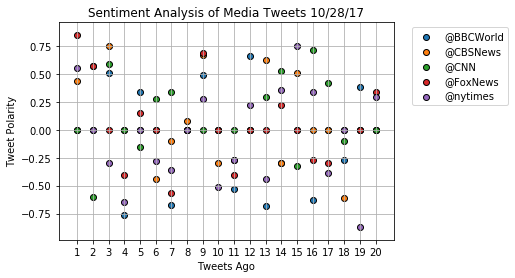

In [27]:
for item in sentiment_array:
    [int(x) for x in item["Tweets Ago"]]
    df = pd.DataFrame(item)
    plt.scatter(item["Tweets Ago"], item["Compound Score"], label = item["Outlet"], edgecolors = "black")

# create the titles, legends, and axis
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets %s" % time.strftime("%x"))
plt.xticks(item["Tweets Ago"])
plt.grid()
plt.show()

ValueError: x and y must be the same size